In [156]:
region = 'Anchorage Municipality'
# region = 'Statewide'

In [157]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
from datetime import date
from matplotlib import pyplot as plt
import datetime as dt

In [158]:
df = pd.read_csv('../data/parsed/report_date.csv', parse_dates=['date'],)
# df_report = pd.read_csv('../data/parsed/report_date_cases.csv', parse_dates=['date'])

In [159]:
df.head()

,date,region,resident,nonresident,total
0,2020-03-12,Statewide,0,1,1
1,2020-03-12,Anchorage Municipality,0,1,1
2,2020-03-12,Fairbanks North Star Borough,0,0,0
3,2020-03-12,Juneau City and Borough,0,0,0
4,2020-03-12,MatSu Borough,0,0,0


In [160]:
df.columns

Index(['date', 'region', 'resident', 'nonresident', 'total'], dtype='object')

In [161]:
df.region.unique()

array(['Statewide', 'Anchorage Municipality',
       'Fairbanks North Star Borough', 'Juneau City and Borough',
       'MatSu Borough', 'Northwest Region', 'Kenai Peninsula Borough',
       'Other Southeast Region - Northern',
       'Other Southeast Region - Southern', 'Southwest Region', 'Unknown',
       'Other Interior Region', 'Y-K Delta Region'], dtype=object)

In [162]:
df = df[df['region']==region].copy().set_index('date').resample('1d').mean().fillna(0)
# df_report = df_report[df_report['region']==region].copy()

In [163]:
df.tail()

,resident,nonresident,total
date,,,
2021-07-02,23.0,1.0,24.0
2021-07-03,26.0,1.0,27.0
2021-07-04,25.0,0.0,25.0
2021-07-05,10.0,4.0,14.0
2021-07-06,38.0,1.0,39.0


In [164]:
df['smoothed'] = df['resident'].rolling(7,
        win_type='gaussian',
        min_periods=3,
        center=True).mean(std=3).round()

# df_report['smoothed'] = df_report['cases'].rolling(7,
#         win_type='gaussian',
#         min_periods=3,
#         center=True).mean(std=3).round()

In [165]:
# p1 = figure(x_axis_type='datetime', title='Anchorage Daily Cases', aspect_ratio=1.75)
# # p1.xaxis.axis_label = 'Date'
# p1.yaxis.axis_label = 'Daily Total'
# p1.circle('date', 'cases', color='gray', alpha=0.7, source=df)
# p1.line('date', 'smoothed', color='blue', alpha=0.8, source=df)

# # Indicate the stay-at-home duration
# p1.add_layout(BoxAnnotation(left=parse('16 MAR 2020'), 
#                             right=parse('27 APR 2020'), 
#                             fill_color='red', 
#                             fill_alpha=0.025))

# # Indicate the mask mandate duration
# p1.add_layout(BoxAnnotation(left=parse('29 JUN 2020'), 
#                             right=date.today(), 
#                             fill_color='orange', 
#                             fill_alpha=0.05))

# # add Memorial Day Weekend start
# p1.add_layout(Span(location=parse('22 MAY 2020'),
#                           dimension='height', line_color='black',
#                           line_dash='dashed', line_width=1))

# # add Summer Solistce (only in Alaska...)
# p1.add_layout(Span(location=parse('20 JUN 2020'),
#                           dimension='height', line_color='black',
#                           line_dash='dashed', line_width=1))

# # add Independence Day Weekend
# p1.add_layout(Span(location=parse('3 JUL 2020'),
#                           dimension='height', line_color='black',
#                           line_dash='dashed', line_width=1))

# p1.add_tools(HoverTool(
#     tooltips=[
#         ('date', '@{date}{%F}'),
#         ('cases', '@cases'), # use @{ } for field names with spaces
#         ('smoothed', '@smoothed'),
#     ],
#     formatters={
#         '@{date}': 'datetime'
#     },
# ))

# # show(p1)
# # output_file('../plots/Anchorage Cases.html', mode='inline')
# # save(p1)

In [166]:
# p1 = figure(x_axis_type='datetime', title='Anchorage Daily Cases', aspect_ratio=1.75)
# # p1.xaxis.axis_label = 'Date'
# p1.yaxis.axis_label = 'Daily Total'
# # p1.circle(df['date'], df['cases'], color='gray', alpha=0.7)
# p1.line(df.index, df['smoothed'], color='blue', alpha=0.8, legend_label='Corrected')
# p1.line(df_report['date'], df_report['smoothed'], color='orange', alpha=0.8, legend_label='Report Date')

# # Indicate the stay-at-home duration
# p1.add_layout(BoxAnnotation(left=parse('16 MAR 2020'), 
#                             right=parse('27 APR 2020'), 
#                             fill_color='red', 
#                             fill_alpha=0.025))

# # Indicate the mask mandate duration
# p1.add_layout(BoxAnnotation(left=parse('29 JUN 2020'), 
#                             right=date.today(), 
#                             fill_color='orange', 
#                             fill_alpha=0.05))

# # add Memorial Day Weekend start
# p1.add_layout(Span(location=parse('22 MAY 2020'),
#                           dimension='height', line_color='black',
#                           line_dash='dashed', line_width=1))

# # add Summer Solistce (only in Alaska...)
# p1.add_layout(Span(location=parse('20 JUN 2020'),
#                           dimension='height', line_color='black',
#                           line_dash='dashed', line_width=1))

# # add Independence Day Weekend
# p1.add_layout(Span(location=parse('3 JUL 2020'),
#                           dimension='height', line_color='black',
#                           line_dash='dashed', line_width=1))

# p1.legend.location = 'top_left'

# # show(p1)
# # output_file('../plots/Anchorage Cases.html', mode='inline')
# # save(p1)

In [167]:
df['smoothed_total'] = df['total'].rolling(7,
        win_type='gaussian',
        min_periods=3,
        center=True).mean(std=3).round()

In [168]:
df['two_week_avg'] = df['total'].rolling(14).mean().round(decimals=1)
df['one_week_avg'] = df['total'].rolling(7).mean().round(decimals=1)

In [169]:
vacc_dates = {
    '15 DEC 2020' : '1st Pfizer Dose', 
    '22 DEC 2020' : '1st Moderna Dose', 
}


In [170]:
df = df[df.index<pd.to_datetime(date.today())]

In [171]:
df.head()

,resident,nonresident,total,smoothed,smoothed_total,two_week_avg,one_week_avg
date,,,,,,,
2020-03-12,0.0,1.0,1.0,0.0,0.0,NaN,NaN
2020-03-13,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2020-03-14,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2020-03-15,0.0,0.0,0.0,0.0,1.0,NaN,NaN
2020-03-16,0.0,0.0,0.0,1.0,1.0,NaN,NaN


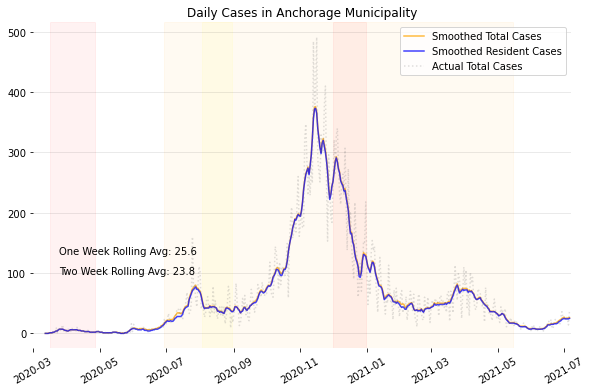

In [172]:
fig, ax = plt.subplots(figsize=(600/72,400/72))
ax.set_title('Daily Cases in ' + region)
ax.plot(df.index, df['smoothed_total'], c='orange', label='Smoothed Total Cases', linestyle='-', zorder=1, alpha=.75)
ax.plot(df.index, df['smoothed'], c='blue', label='Smoothed Resident Cases', linestyle='-', zorder=1, alpha=.75)
ax.plot(df.index, df['total'], c='gray', label='Actual Total Cases', linestyle=':', zorder=1, alpha=.25)


ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.autofmt_xdate(ha='center', )

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2))

ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)

ax.axvspan(parse('16 MAR 2020'), parse('27 APR 2020'), alpha=0.05, color='red') # safer at home order

if region == 'Anchorage Municipality':
    ax.axvspan(parse('29 JUN 2020'), parse('15 MAY 2021'), alpha=0.05, color='orange') # mask mandate
    ax.axvspan(parse('3 AUG 2020'), parse('30 AUG 2020'), alpha=0.05, color='yellow') # mask mandate
    ax.annotate('Two Week Rolling Avg: ' + str(df['two_week_avg'].iloc[-1]),
                xy=(0.1, 0.3),  # theta, radius
                xytext=(0.1, 0.3),    # fraction, fraction
                textcoords='figure fraction',
                xycoords='figure fraction',
                )
    ax.annotate('One Week Rolling Avg: ' + str(df['one_week_avg'].iloc[-1]),
            xy=(0.1, 0.3),  # theta, radius
            xytext=(0.1, 0.35),    # fraction, fraction
            textcoords='figure fraction',
            xycoords='figure fraction',
            )
    ax.axvspan(parse('1 DEC 2020'), parse('31 DEC 2020'), alpha=0.05, color='red') # safer at home order

    
# for key, value in vacc_dates.items():
#     plt.axvline(parse(key), color='k', linewidth=1)
#     plt.text(parse(key), y2*0.01, value, rotation=90, va='bottom', ha='right')
    
#     plt.axvline(parse('5 OCT 2020'), color='black')
ax.legend()

fig.set_facecolor('w')

ax.set_xlim(pd.Timestamp('2020-03-01'), date.today())
fig.tight_layout()

In [173]:
df[df['two_week_avg']<=8.1].tail(5)

,resident,nonresident,total,smoothed,smoothed_total,two_week_avg,one_week_avg
date,,,,,,,
2021-06-10,6.0,1.0,7.0,7.0,8.0,7.9,7.0
2021-06-11,8.0,0.0,8.0,7.0,8.0,7.7,7.1
2021-06-12,4.0,0.0,4.0,8.0,8.0,7.4,6.9
2021-06-13,8.0,0.0,8.0,8.0,9.0,7.6,7.6
2021-06-14,8.0,1.0,9.0,10.0,11.0,7.9,8.0


In [180]:
df.tail(60)

,resident,nonresident,total,smoothed,smoothed_total,two_week_avg,one_week_avg
date,,,,,,,
2021-05-08,40.0,1.0,41.0,26.0,27.0,33.9,32.9
2021-05-09,11.0,0.0,11.0,23.0,24.0,32.6,31.0
2021-05-10,11.0,1.0,12.0,21.0,22.0,31.9,30.1
2021-05-11,20.0,0.0,20.0,19.0,20.0,30.3,26.7
2021-05-12,16.0,1.0,17.0,17.0,17.0,27.4,24.3
2021-05-13,25.0,1.0,26.0,17.0,18.0,26.5,22.7
2021-05-14,17.0,1.0,18.0,17.0,18.0,25.9,20.7
2021-05-15,13.0,0.0,13.0,17.0,18.0,24.8,16.7
2021-05-16,11.0,1.0,12.0,17.0,18.0,23.9,16.9


In [175]:
df['one_week_avg'].iloc[-1]

25.6

In [176]:
cop_dates = {
    '5 OCT 2020' : '100% In Office', 
    '17 MAR 2020' : '    100% WFH', 
    '15 JUN 2020' : '       Phase 2', 
    '20 JUL 2020' : 'Phase 3', 
    '27 JUL 2020' : 'Voluntary WFH', 
    '12 NOV 2020' : 'Governor WFH',
    
    
    
    
    '15 MAR 2021' : '100% In Office',
}


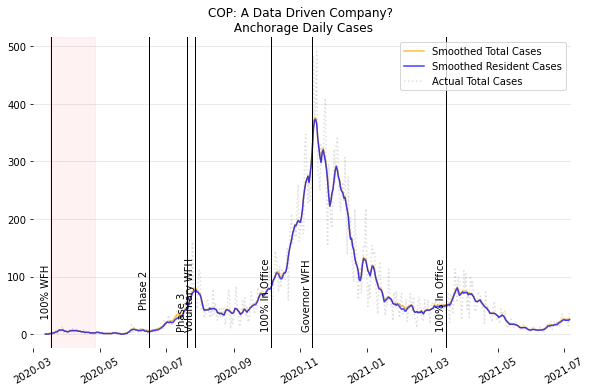

In [177]:
fig, ax = plt.subplots(figsize=(600/72,400/72))
ax.set_title('COP: A Data Driven Company? \n Anchorage Daily Cases')
ax.plot(df.index, df['smoothed_total'], c='orange', label='Smoothed Total Cases', linestyle='-', zorder=1, alpha=.75)
ax.plot(df.index, df['smoothed'], c='blue', label='Smoothed Resident Cases', linestyle='-', zorder=1, alpha=.75)
ax.plot(df.index, df['total'], c='gray', label='Actual Total Cases', linestyle=':', zorder=1, alpha=.25)


ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.autofmt_xdate(ha='center', )

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2))

ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)

ax.axvspan(parse('16 MAR 2020'), parse('27 APR 2020'), alpha=0.05, color='red') # safer at home order

if region == 'Anchorage':
    ax.axvspan(parse('29 JUN 2020'), date.today(), alpha=0.05, color='orange') # mask mandate
    ax.axvspan(parse('3 AUG 2020'), parse('30 AUG 2020'), alpha=0.05, color='yellow') # mask mandate
#     ax.annotate('Two Week Rolling Avg: ' + str(df['two_week_avg'].iloc[-1]),
#                 xy=(0.1, 0.3),  # theta, radius
#                 xytext=(0.1, 0.3),    # fraction, fraction
#                 textcoords='figure fraction',
#                 xycoords='figure fraction',
#                 )
#     ax.annotate('One Week Rolling Avg: ' + str(df['one_week_avg'].iloc[-1]),
#             xy=(0.1, 0.3),  # theta, radius
#             xytext=(0.1, 0.35),    # fraction, fraction
#             textcoords='figure fraction',
#             xycoords='figure fraction',
#             )
    
for key, value in cop_dates.items():
    plt.axvline(parse(key), color='k', linewidth=1)
    plt.text(parse(key), y2*0.01, value, rotation=90, va='bottom', ha='right')

ax.legend(loc='best')

fig.set_facecolor('w')

ax.set_xlim(pd.Timestamp('2020-03-01'), date.today())
fig.tight_layout()
plt.savefig('COP.pdf', dpi=400)